In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
#import time

In [2]:
iris = datasets.load_iris()

In [49]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [50]:
df['target'] = iris['target']

In [57]:
df = df.loc[(df['target']==0)|(df['target']==1)]

In [6]:
#X = df.iloc[:,0:2]#实验数据

In [7]:
#Y = df.iloc[:,4]

In [8]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [9]:
#批次梯度上升
def gradAscent(X,Y,alpha = 0.001,iteration = 500):
    m,n = X.shape
    weights = np.ones(n+1)
    X = np.column_stack((X,np.ones(m)))
    for i in range(iteration):
        h = sigmoid(weights.dot(X.transpose()))
        grad = (Y-h).dot(X)
        #梯度 = (y-h(z))*x
        weights = weights + alpha*grad
    return weights

In [10]:
#绘制决策边界
X0 = df.ix[df['target']==0,0:2]
X1 = df.ix[df['target']==1,0:2]

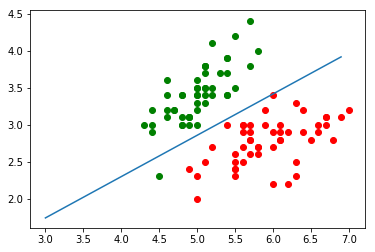

In [11]:
plt.scatter(X0.iloc[:,0],X0.iloc[:,1],c='green')
plt.scatter(X1.iloc[:,0],X1.iloc[:,1],c='red')
x = np.arange(3,7,0.1)
w = gradAscent(X,Y,iteration=500)
y = -(w[2]+w[0]*x)/w[1]
plt.plot(x,y)

In [12]:
#随机梯度上升
def stocGradAscent(X,Y,alpha = 0.001,iteration=500):
    m,n = X.shape
    weights = np.ones(n+1)
    X = np.column_stack((X,np.ones(m)))
    for j in range(iteration):
        for i in range(m):
            h = sigmoid(weights.dot(X.T[:,i]))
            grad = (Y[i]-h)*(X[i,:])
            weights = weights + alpha*grad
    return weights

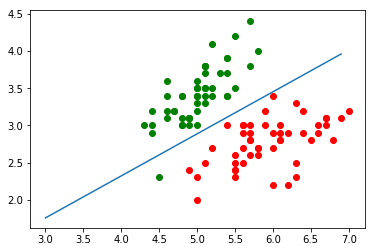

In [13]:
plt.scatter(X0.iloc[:,0],X0.iloc[:,1],c='green')
plt.scatter(X1.iloc[:,0],X1.iloc[:,1],c='red')
x = np.arange(3,7,0.1)
N = stocGradAscent(X,Y)
y = -(N[2]+N[0]*x)/N[1]
plt.plot(x,y)

In [14]:
#改进随机梯度上升
def stocGradAscent1(X,Y,iteration=500):
    m,n = X.shape
    X = np.column_stack((X,np.ones(m)))
    weights = np.ones(n+1)
    for j in range(iteration):
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01#步长递减
            randi = np.random.randint(m)#随机选取样本
            h = sigmoid(weights.dot(X.T[:,randi]))
            grad = (Y[randi]-h)*(X[randi,:])
            weights = weights + alpha*grad
    return weights

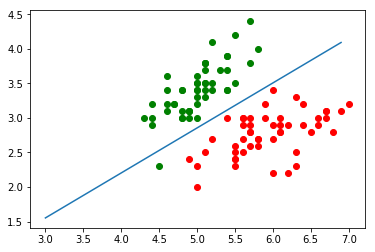

In [15]:
plt.scatter(X0.iloc[:,0],X0.iloc[:,1],c='green')
plt.scatter(X1.iloc[:,0],X1.iloc[:,1],c='red')
x = np.arange(3,7,0.1)
O = stocGradAscent1(X,Y,iteration=600)
y = -(O[2]+O[0]*x)/O[1]
plt.plot(x,y)

In [44]:
def classifyVector (X):
    pred_y = []
    m,n = X.shape
    X = np.column_stack((X,np.ones(m)))
    prob = sigmoid(weights.dot(X.T))
    for i in prob:
        if i > 0.5:
            pred_y.append(1)
        else:
            pred_y.append(0)
    return pred_y

In [58]:
X = df.iloc[:,0:4]
Y = df.iloc[:,4]

In [59]:
weights = stocGradAscent1(X,Y)

In [60]:
weights

array([-1.37576219, -7.56202168,  9.90249413,  3.95584206,  0.16364638])

In [61]:
classifyVector(X)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [64]:
sum(classifyVector(X)-Y)

0